<a href="https://colab.research.google.com/github/yuhui-0611/ESAA/blob/main/ESAA_YB_mini_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#미니 프로젝트 (3)
##영화 관객 수 예측 경진대회
- 회귀 알고리즘을 이용하여 예측하기

###1. 전처리

In [ ]:
# 한글 폰트 설정
# 나눔 바른 고딕 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum -qq
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib
import matplotlib.pyplot as plt # Add this line
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
print("한글 폰트 설정 완료")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # Add this line
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
import pandas as pd
train= pd.read_csv('movies_train.csv')
train.head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


##결측치 확인

In [ ]:
train.isna().sum()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,330
dir_prev_num,0
num_staff,0


### 이전 영화 박스오피스 수 (dir_prev_num)의 na 값 0으로 채움

In [ ]:
train.dir_prev_bfnum.fillna(0, inplace=True)

###release_time 을 날짜로 인식하도록 변경하고 년,월, 일 구별하는 피처 생성

In [ ]:
train['release_time']= pd.to_datetime(train['release_time'])
train['year']= train['release_time'].dt.year
train['month']= train['release_time'].dt.month
train['weekday']= train['release_time'].dt.day_of_week
# 0~6 : 월요일~일요일

train.head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month,weekday
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,2012,11,3
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015,11,3
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013,6,2
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012,7,3
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010,11,3


### 상관관계가 높거나 불필요한 피처 제거

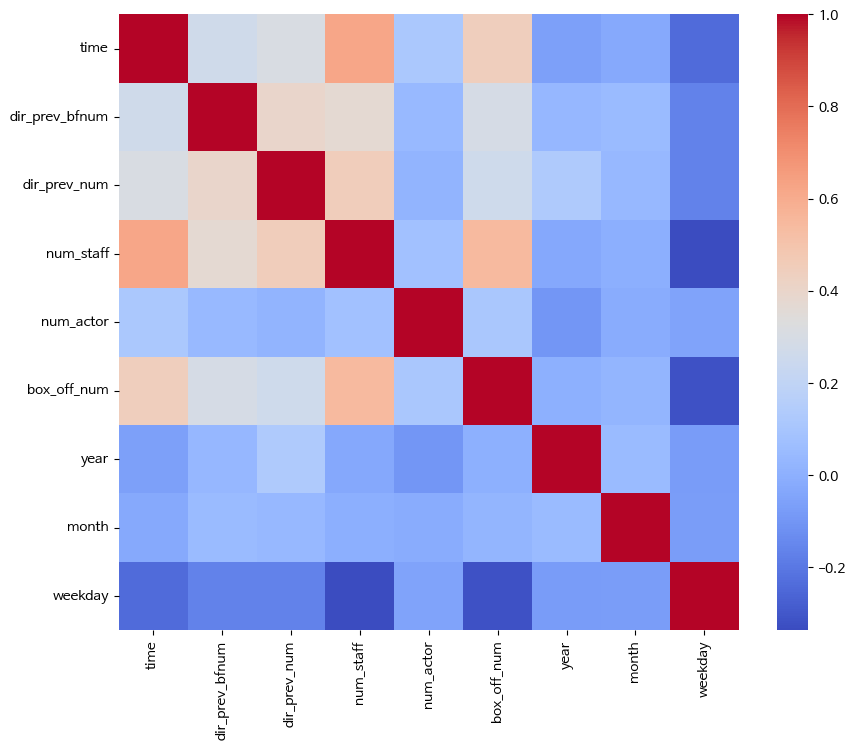

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = train.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()


In [ ]:
import numpy as np

# 상관계수 행렬
corr_matrix = train.corr(numeric_only=True).abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 기준 이상이면 제거 리스트에 추가
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

print("제거 후보:", to_drop)


제거 후보: ['num_staff']


- 상관계수가 0.6 이상인 변수 num_staff 하나뿐 -> 선택해서 드랍해도 되고 안해도 될듯

In [ ]:
numeric_cols = train.select_dtypes(include=['number'])
numeric_cols.corr()['num_staff'].sort_values(ascending=False)

,num_staff
num_staff,1.000000
time,0.623205
box_off_num,0.544265
dir_prev_num,0.450706
dir_prev_bfnum,0.369657
num_actor,0.077871
month,-0.002841
year,-0.032891
weekday,-0.336794


- 피처별 분포 모양을 보고 로그변환 해주기

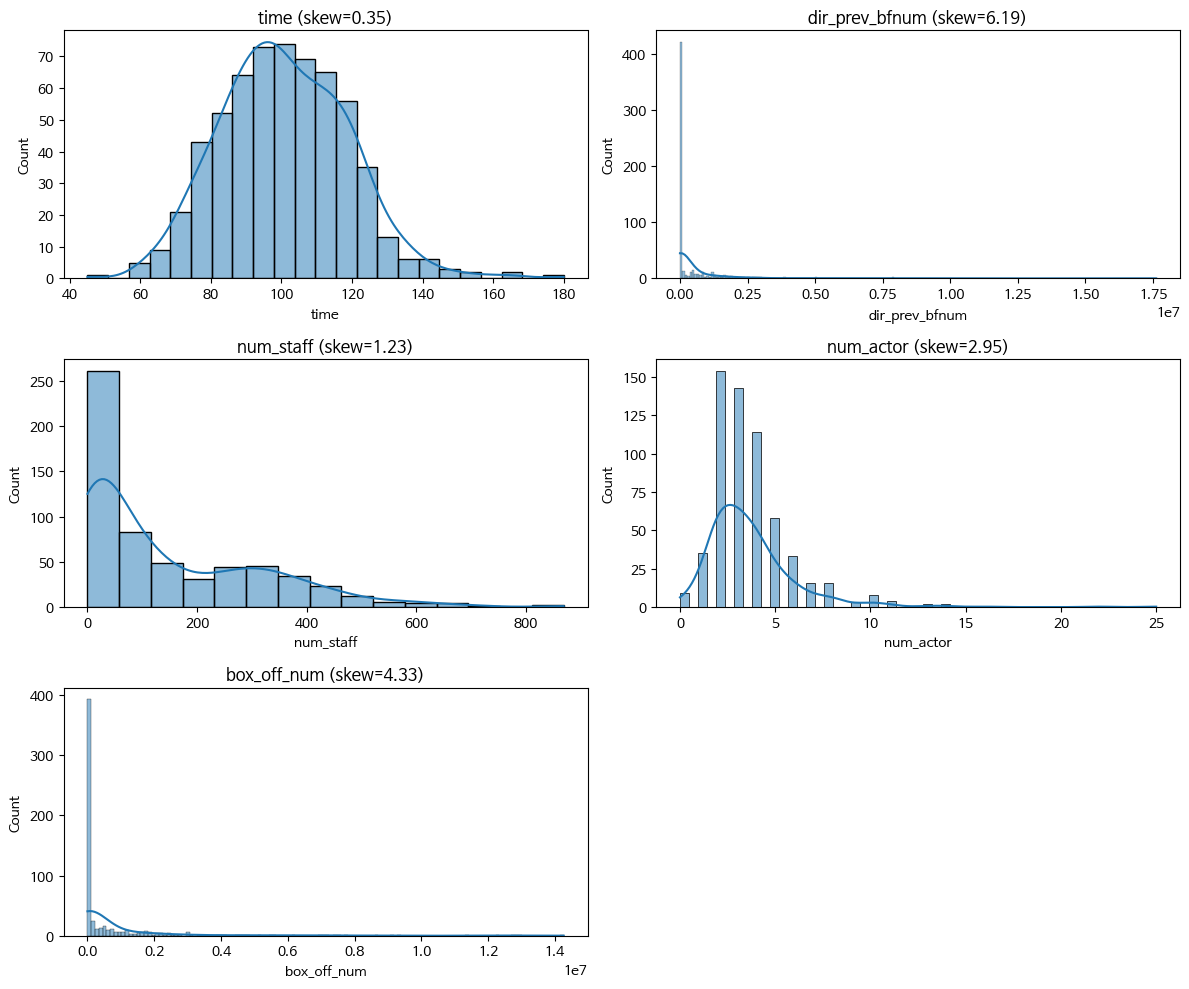

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['time', 'dir_prev_bfnum',
        'num_staff', 'num_actor', 'box_off_num']

plt.figure(figsize=(12, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(train[col], kde=True)
    plt.title(f"{col} (skew={train[col].skew():.2f})")

plt.tight_layout()
plt.show()

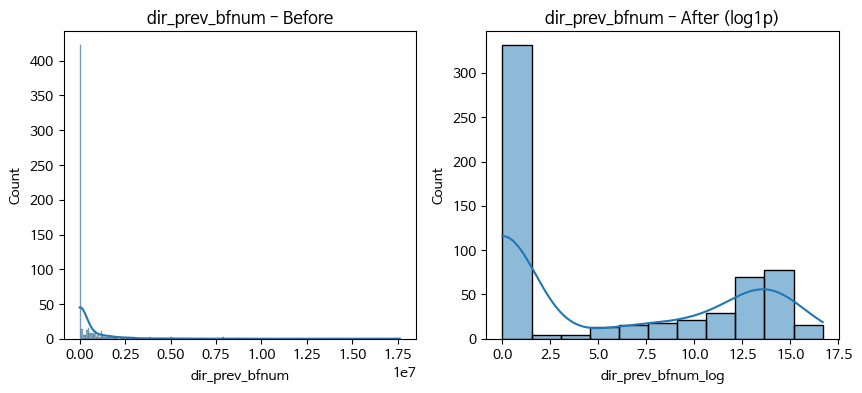

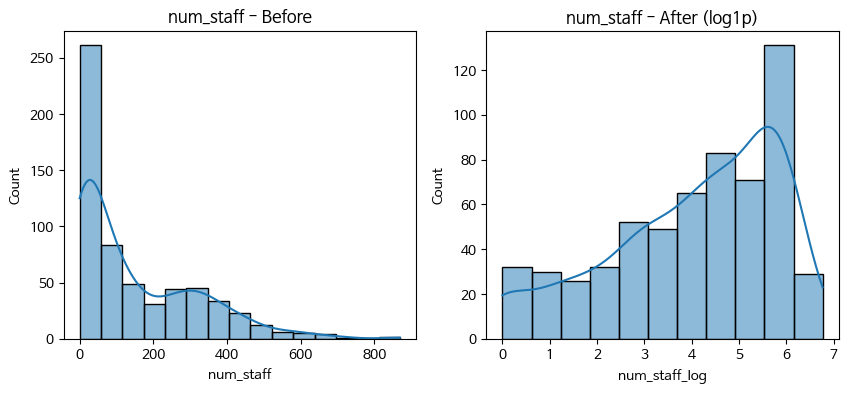

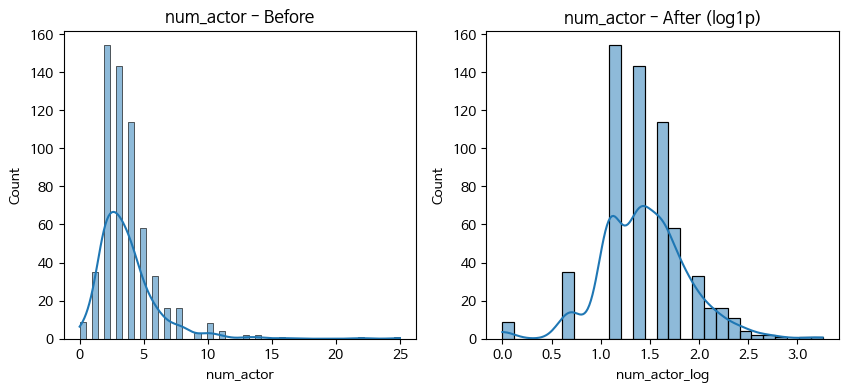

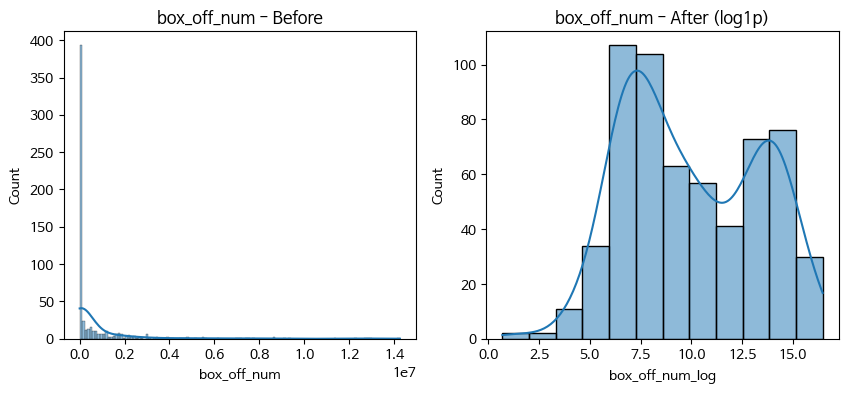

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cols_to_transform = ['dir_prev_bfnum', 'num_staff', 'num_actor', 'box_off_num']

# 변환 전후 분포 비교
for col in cols_to_transform:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    sns.histplot(train[col], ax=ax[0], kde=True)
    ax[0].set_title(f"{col} - Before")

    # log1p 변환 (log(x+1))
    train[col + "_log"] = np.log1p(train[col])

    sns.histplot(train[col + "_log"], ax=ax[1], kde=True)
    ax[1].set_title(f"{col} - After (log1p)")

    plt.show()


- 분포가 안정적으로 바뀐 box_off_num_log, num_actor_log 피처는 로그변환하면 좋을듯.
- 나머지 dir_prev_bfnum, num_staff 는 로그변환해도 치우친 모습 -> 선택하면 될듯

**겹치거나 무의미한 컬럼들 삭제**
-  title
- director
- release_time

이미 year, month, weekday로 분리했으니까 중복됨

- box_off_num

이미 타깃을 box_off_num_log 로 사용하니까 제거

- num_actor
- num_staff
- dir_prev_bfnum

로그변환한 것을 사용하기 위해 원래 컬럼 제거

In [ ]:
cols_to_drop = [
    'title', 'director', 'release_time',
    'distributor',
    'box_off_num',
    'num_actor', 'num_staff', 'dir_prev_bfnum',
]

train = train.drop(columns=cols_to_drop)

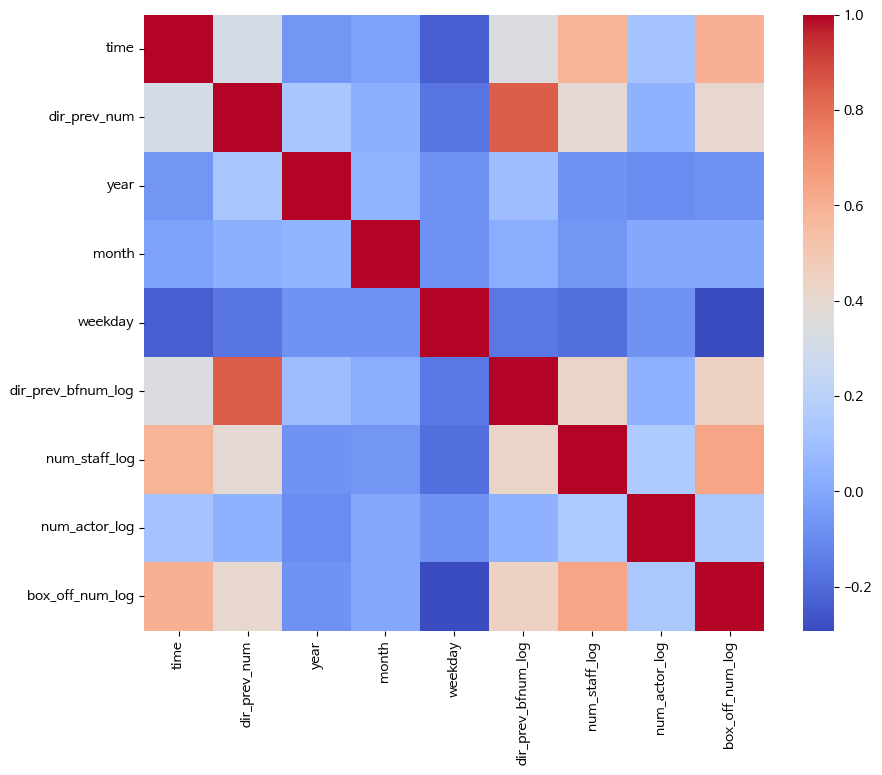

In [ ]:
corr = train.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()

In [ ]:
#상관관계가 높은 것 제거
train = train.drop(columns=['dir_prev_num'])

In [ ]:
train.head()

,genre,time,screening_rat,year,month,weekday,dir_prev_bfnum_log,num_staff_log,num_actor_log,box_off_num_log
0,액션,96,청소년 관람불가,2012,11,3,0.000000,4.521789,1.098612,10.060449
1,느와르,130,청소년 관람불가,2015,11,3,13.965312,5.961005,1.386294,15.771725
2,액션,123,15세 관람가,2013,6,2,12.304905,5.840642,1.609438,15.755558
3,코미디,101,전체 관람가,2012,7,3,10.081425,3.044522,1.945910,12.291640
4,코미디,108,15세 관람가,2010,11,3,0.693147,5.529429,1.098612,13.088575


In [ ]:
cols_to_ohe = ['genre', 'screening_rat', 'year', 'month', 'weekday']

train = pd.get_dummies(train, columns=cols_to_ohe)

In [ ]:
train.head()

,time,dir_prev_bfnum_log,num_staff_log,num_actor_log,box_off_num_log,genre_SF,genre_공포,genre_느와르,genre_다큐멘터리,genre_드라마,...,month_9,month_10,month_11,month_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5
0,96,0.000000,4.521789,1.098612,10.060449,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,130,13.965312,5.961005,1.386294,15.771725,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
2,123,12.304905,5.840642,1.609438,15.755558,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,101,10.081425,3.044522,1.945910,12.291640,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,108,0.693147,5.529429,1.098612,13.088575,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


* Residuals QQplot

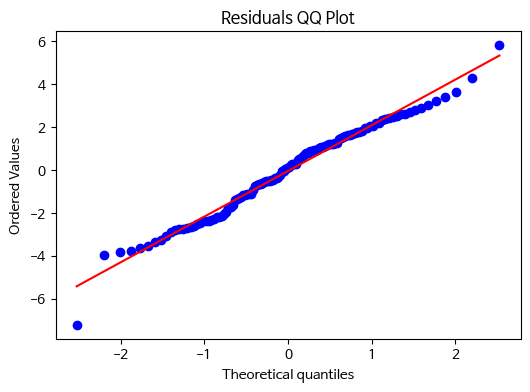

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Residuals QQ Plot")
plt.show()

선형 모델이 데이터의 중간대 예측은 괜찮게 하지만 극단 값들을 잘 예측하지 못할 수 있다.


**->PolynomialFeatures 사용해보면 좋을듯..**

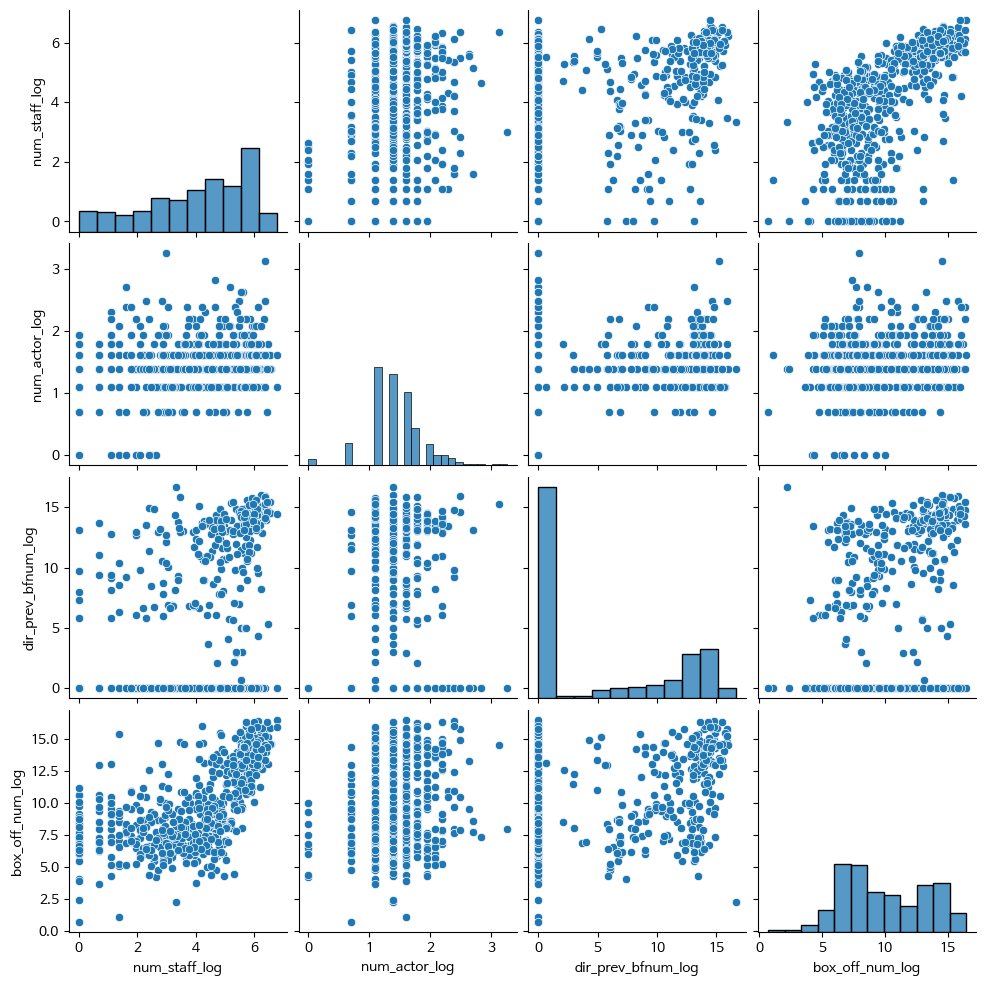

In [ ]:
sns.pairplot(train[['num_staff_log', 'num_actor_log', 'dir_prev_bfnum_log', 'box_off_num_log']])
plt.show()

dir_prev_bfnum_log 의 경우 0인값이 매우많다. (신인감독)

신인 여부를 새로 칼럼을 추가해보자

In [ ]:
train['is_rookie_director'] = (train['dir_prev_bfnum_log'] == 0).astype(int)

#**최종 전처리 코드 정리**

1) train

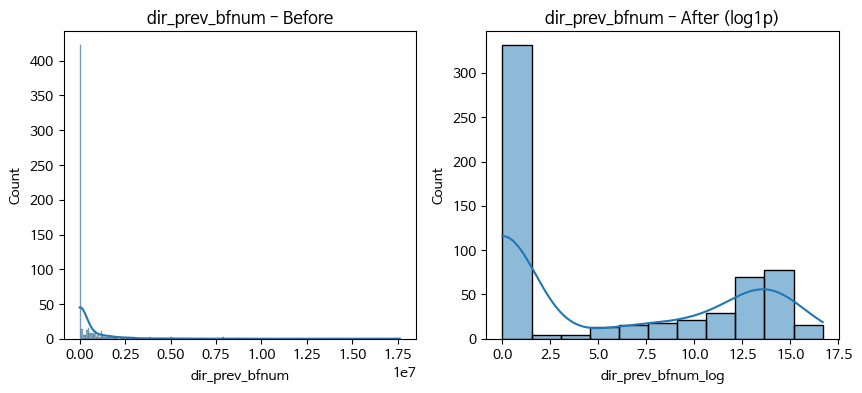

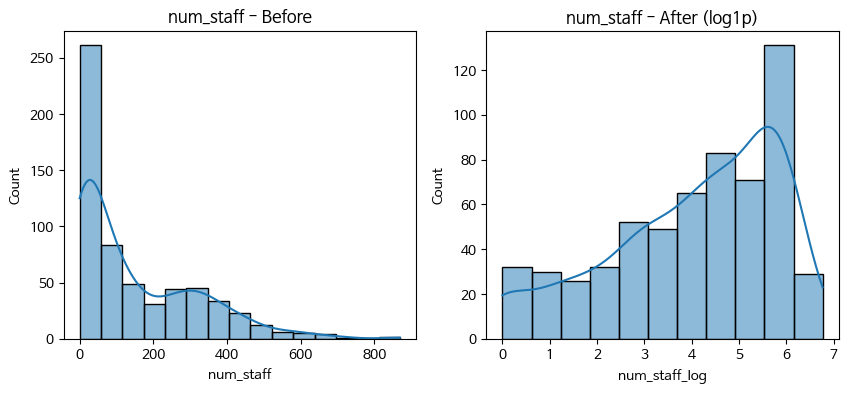

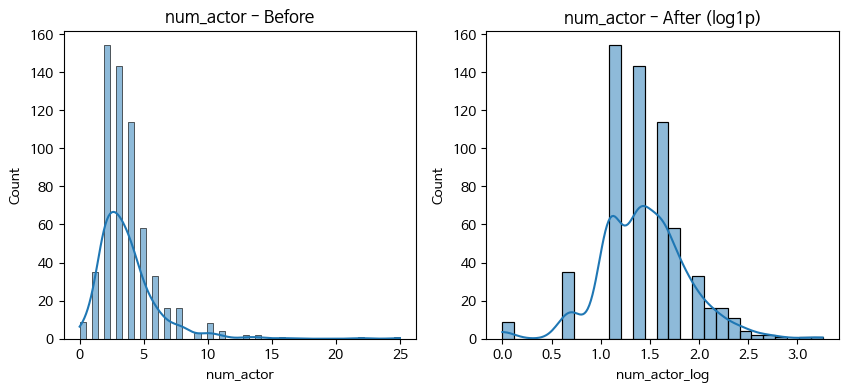

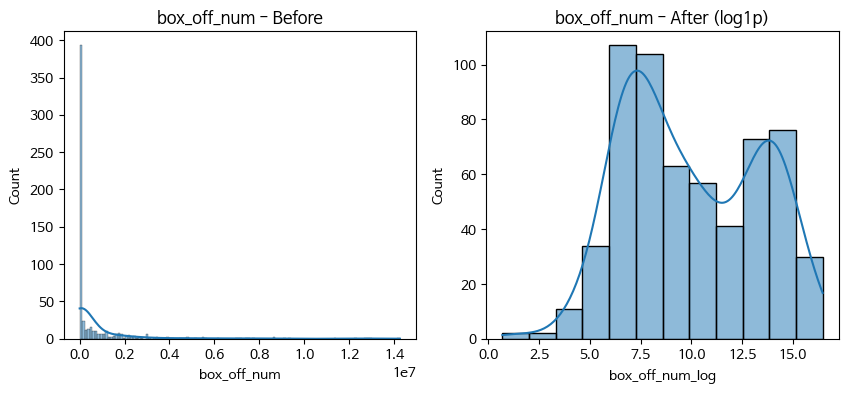

   time  dir_prev_bfnum_log  num_staff_log  num_actor_log  box_off_num_log  \
0    96            0.000000       4.521789       1.098612        10.060449   
1   130           13.965312       5.961005       1.386294        15.771725   
2   123           12.304905       5.840642       1.609438        15.755558   
3   101           10.081425       3.044522       1.945910        12.291640   
4   108            0.693147       5.529429       1.098612        13.088575   

   genre_SF  genre_공포  genre_느와르  genre_다큐멘터리  genre_드라마  ...  month_10  \
0     False     False      False        False      False  ...     False   
1     False     False       True        False      False  ...     False   
2     False     False      False        False      False  ...     False   
3     False     False      False        False      False  ...     False   
4     False     False      False        False      False  ...     False   

   month_11  month_12  weekday_0  weekday_1  weekday_2  weekday_3  weekday_4  \


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('movies_train.csv')

#결측치 처리
train['dir_prev_bfnum'].fillna(0, inplace=True)

#날짜 처리
train['release_time'] = pd.to_datetime(train['release_time'])
train['year'] = train['release_time'].dt.year
train['month'] = train['release_time'].dt.month
train['weekday'] = train['release_time'].dt.day_of_week

#로그 변환
cols_to_transform = ['dir_prev_bfnum', 'num_staff', 'num_actor', 'box_off_num']

for col in cols_to_transform:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    sns.histplot(train[col], ax=ax[0], kde=True)
    ax[0].set_title(f"{col} - Before")

    train[col + "_log"] = np.log1p(train[col])

    sns.histplot(train[col + "_log"], ax=ax[1], kde=True)
    ax[1].set_title(f"{col} - After (log1p)")

    plt.show()

#제거할 원본 변수들
cols_to_drop = [
    'title', 'director', 'release_time',
    'distributor',
    'box_off_num',
    'num_actor', 'num_staff', 'dir_prev_bfnum',
]

train = train.drop(columns=cols_to_drop)

train = train.drop(columns=['dir_prev_num'])

# One-Hot Encoding
cols_to_ohe = ['genre', 'screening_rat', 'year', 'month', 'weekday']
train = pd.get_dummies(train, columns=cols_to_ohe)

#신인 감독 여부 파생 변수
train['is_rookie_director'] = (train['dir_prev_bfnum_log'] == 0).astype(int)

# 결과 확인
print(train.head())
print("train shape:", train.shape)


2. test

train과 똑같이 적용

In [ ]:
test = pd.read_csv('movies_test.csv')

test['dir_prev_bfnum'].fillna(0, inplace=True)

test['release_time'] = pd.to_datetime(test['release_time'])
test['year'] = test['release_time'].dt.year
test['month'] = test['release_time'].dt.month
test['weekday'] = test['release_time'].dt.day_of_week

cols_to_transform = ['dir_prev_bfnum', 'num_staff', 'num_actor']

for col in cols_to_transform:
    test[col + "_log"] = np.log1p(test[col])

cols_to_drop = [
    'title', 'director', 'release_time',
    'distributor',
    'num_actor', 'num_staff', 'dir_prev_bfnum',
]

test = test.drop(columns=cols_to_drop)

test = test.drop(columns=['dir_prev_num'])

cols_to_ohe = ['genre', 'screening_rat', 'year', 'month', 'weekday']
test = pd.get_dummies(test, columns=cols_to_ohe)

test['is_rookie_director'] = (test['dir_prev_bfnum_log'] == 0).astype(int)


데이터 분리

In [ ]:
y = train['box_off_num_log']

X = train.drop(columns=['box_off_num_log'])

X_test = test.reindex(columns=X.columns, fill_value=0)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("X_test shape:", X_test.shape)

X shape: (600, 45)
y shape: (600,)
X_test shape: (243, 45)
